In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback
import tensorflow.keras.backend as K
from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential # to see the sequence like ip --> hl1 --> hl2--> hl3 -->o/p #to build layer by layer architecture
from keras.layers import Dense # to decide the depth of layers
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError
from keras.models import load_model

In [21]:
df = pd.read_csv('dvd rental final csv.csv')

In [22]:
df

,inventory_id,film_id,title,rental_duration,rental_rate,length,replacement_cost,rating,category,language,store_id,rental_id,rental_date,customer_id,return_date,amount,active
0,3419,749,Rules Human,6,4.99,153,19.99,R,Horror,English,1,1520,2005-06-15 23:57:20,341,2005-06-24 23:46:20,7.99,1
1,2512,552,Majestic Floats,5,0.99,130,15.99,PG,Documentary,English,2,1778,2005-06-16 18:54:48,341,2005-06-22 16:08:48,1.99,1
2,2507,551,Maiden Home,3,4.99,138,9.99,PG,New,English,1,1849,2005-06-17 00:13:19,341,2005-06-23 18:37:19,7.99,1
3,2047,445,Hyde Doctor,5,2.99,100,11.99,G,Classics,English,1,2829,2005-06-19 21:11:30,341,2005-06-24 18:10:30,2.99,1
4,2569,563,Massacre Usual,6,4.99,165,16.99,R,Games,English,1,3130,2005-06-20 19:03:22,341,2005-06-29 18:05:22,7.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14591,1148,254,Driver Annie,4,2.99,159,11.99,PG-13,Sports,English,1,12682,2006-02-14 15:16:03,245,NaN,2.99,1
14592,3998,870,Swarm Gold,4,0.99,123,12.99,PG-13,Horror,English,2,14107,2006-02-14 15:16:03,251,NaN,0.99,1
14593,1146,253,Drifter Commandments,5,4.99,61,18.99,PG-13,Action,English,2,13756,2006-02-14 15:16:03,252,NaN,4.99,1
14594,1219,270,Earth Vision,7,0.99,85,29.99,NC-17,New,English,2,15293,2006-02-14 15:16:03,263,NaN,0.99,1


In [23]:
df.isnull().sum()

inventory_id          0
film_id               0
title                 0
rental_duration       0
rental_rate           0
length                0
replacement_cost      0
rating                0
category              0
language              0
store_id              0
rental_id             0
rental_date           0
customer_id           0
return_date         183
amount                0
active                0
dtype: int64

In [24]:
df.dropna(inplace=True)

In [25]:
# Convert the 'date' column to datetime
df['rental_date'] = pd.to_datetime(df['rental_date'])

# Extract year, month, day, hour, minute, and second
df['rental_year'] = df['rental_date'].dt.year
df['rental_month'] = df['rental_date'].dt.month
df['rental_day'] = df['rental_date'].dt.day
df['rental_hour'] = df['rental_date'].dt.hour
df['rental_minute'] = df['rental_date'].dt.minute

df.drop('rental_date', axis=1, inplace=True)

df.head()

,inventory_id,film_id,title,rental_duration,rental_rate,length,replacement_cost,rating,category,language,...,rental_id,customer_id,return_date,amount,active,rental_year,rental_month,rental_day,rental_hour,rental_minute
0,3419,749,Rules Human,6,4.99,153,19.99,R,Horror,English,...,1520,341,2005-06-24 23:46:20,7.99,1,2005,6,15,23,57
1,2512,552,Majestic Floats,5,0.99,130,15.99,PG,Documentary,English,...,1778,341,2005-06-22 16:08:48,1.99,1,2005,6,16,18,54
2,2507,551,Maiden Home,3,4.99,138,9.99,PG,New,English,...,1849,341,2005-06-23 18:37:19,7.99,1,2005,6,17,0,13
3,2047,445,Hyde Doctor,5,2.99,100,11.99,G,Classics,English,...,2829,341,2005-06-24 18:10:30,2.99,1,2005,6,19,21,11
4,2569,563,Massacre Usual,6,4.99,165,16.99,R,Games,English,...,3130,341,2005-06-29 18:05:22,7.99,1,2005,6,20,19,3


In [26]:
df['return_date'] = pd.to_datetime(df['return_date'])

# Extract year, month, day, hour, minute, and second
df['return_year'] = df['return_date'].dt.year
df['return_month'] = df['return_date'].dt.month
df['return_day'] = df['return_date'].dt.day
df['return_hour'] = df['return_date'].dt.hour
df['return_minute'] = df['return_date'].dt.minute

df.drop('return_date', axis=1, inplace=True)

In [27]:
df.isnull().sum()

inventory_id        0
film_id             0
title               0
rental_duration     0
rental_rate         0
length              0
replacement_cost    0
rating              0
category            0
language            0
store_id            0
rental_id           0
customer_id         0
amount              0
active              0
rental_year         0
rental_month        0
rental_day          0
rental_hour         0
rental_minute       0
return_year         0
return_month        0
return_day          0
return_hour         0
return_minute       0
dtype: int64

In [28]:
df.drop('language',axis=1, inplace=True)
df.drop('rental_year',axis=1, inplace=True)
df.drop('return_year',axis=1, inplace=True)
df.drop('rental_hour',axis=1, inplace=True)
df.drop('rental_minute',axis=1, inplace=True)
df.drop('return_hour',axis=1, inplace=True)
df.drop('return_minute',axis=1, inplace=True)
df.drop('title',axis=1,inplace=True)
df.drop(['inventory_id','film_id','store_id','rental_id','customer_id'], axis=1, inplace=True)

In [29]:
categorical_column_to_iterate = ['rating', 'category']
continuous_column_to_iterate = ['rental_rate', 'replacement_cost']

In [30]:
df['rating'].value_counts()

rating
PG-13    3203
NC-17    2964
PG       2903
R        2868
G        2475
Name: count, dtype: int64

In [31]:
df['rating'] = df['rating'].map({"PG-13":0,'NC-17':1,'PG':2,'R':3,"G":4})

In [32]:
df['rating'].value_counts()

rating
0    3203
1    2964
2    2903
3    2868
4    2475
Name: count, dtype: int64

In [33]:
df['category'].value_counts()

category
Sports         1066
Animation      1044
Action          996
Sci-Fi          990
Family          975
Drama           946
Foreign         942
Documentary     930
Games           870
Children        855
New             851
Classics        851
Comedy          842
Horror          761
Travel          755
Music           739
Name: count, dtype: int64

In [34]:
df['category'].unique()

array(['Horror', 'Documentary', 'New', 'Classics', 'Games', 'Sci-Fi',
       'Foreign', 'Family', 'Travel', 'Music', 'Sports', 'Comedy',
       'Drama', 'Action', 'Children', 'Animation'], dtype=object)

In [35]:
df['category'] = df['category'].map({'Horror':0, 'Documentary':1, 'New':2, 'Classics':3, 'Games':4, 'Sci-Fi':5,
       'Foreign':6, 'Family':7, 'Travel':8, 'Music':9, 'Sports':10, 'Comedy':11,
       'Drama':12, 'Action':13, 'Children':14, 'Animation':15})

In [36]:
df['category'].value_counts()

category
10    1066
15    1044
13     996
5      990
7      975
12     946
6      942
1      930
4      870
14     855
2      851
3      851
11     842
0      761
8      755
9      739
Name: count, dtype: int64

In [18]:
#encoding
encoders_cont = {}
for col in continuous_column_to_iterate:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders_cont[col] = encoder

with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders_cont, f)

In [19]:
encoders_cont

{'rental_rate': LabelEncoder(), 'replacement_cost': LabelEncoder()}

In [37]:
df.head()

,rental_duration,rental_rate,length,replacement_cost,rating,category,amount,active,rental_month,rental_day,return_month,return_day
0,6,4.99,153,19.99,3,0,7.99,1,6,15,6,24
1,5,0.99,130,15.99,2,1,1.99,1,6,16,6,22
2,3,4.99,138,9.99,2,2,7.99,1,6,17,6,23
3,5,2.99,100,11.99,4,3,2.99,1,6,19,6,24
4,6,4.99,165,16.99,3,4,7.99,1,6,20,6,29


In [38]:
# Separate features and target
x = df.drop('amount', axis=1)  # Replace 'revenue_column' with the actual column name for revenue
y = df['amount']

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [40]:
x_train

,rental_duration,rental_rate,length,replacement_cost,rating,category,active,rental_month,rental_day,return_month,return_day
4056,6,0.99,78,28.99,0,3,1,8,19,8,25
5413,6,2.99,122,16.99,4,1,1,8,18,8,20
8991,3,4.99,167,24.99,0,1,1,7,30,8,4
4901,4,2.99,137,9.99,1,11,1,8,19,8,23
6385,7,2.99,63,27.99,3,7,1,8,18,8,26
...,...,...,...,...,...,...,...,...,...,...,...
3715,7,0.99,99,29.99,1,3,0,8,23,8,29
14161,4,0.99,79,20.99,0,8,1,7,8,7,12
7418,4,2.99,58,22.99,2,2,1,8,18,8,27
5415,3,0.99,137,18.99,3,6,1,8,19,8,26


In [41]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [42]:
x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [43]:
x_train_scaler_df=pd.DataFrame(x_train_scaler,columns = x_train.columns)
x_test_scaler_df=pd.DataFrame(x_test_scaler,columns = x_test.columns)

In [44]:
x_test_scaler_df

,rental_duration,rental_rate,length,replacement_cost,rating,category,active,rental_month,rental_day,return_month,return_day
0,-0.675900,-1.191935,0.641230,1.273679,-1.341354,-1.010234,0.16604,1.088792,0.183084,0.773515,1.221580
1,0.037279,0.019501,1.539834,1.273679,0.086104,-0.140768,0.16604,-0.372802,-0.964205,-0.598252,-0.313801
2,-1.389078,-1.191935,0.541385,-0.206399,0.799834,-0.358135,0.16604,-0.372802,-0.964205,-0.598252,-0.752481
3,0.037279,-1.191935,-0.581870,0.286960,-0.627625,1.380797,0.16604,-0.372802,1.559831,0.773515,-1.520171
4,-1.389078,0.019501,-0.756598,0.286960,0.799834,-0.575501,0.16604,1.088792,0.412542,0.773515,1.002240
...,...,...,...,...,...,...,...,...,...,...,...
3599,1.463636,1.230937,0.092083,-0.370852,-1.341354,0.076598,0.16604,1.088792,0.297813,0.773515,0.453889
3600,-0.675900,1.230937,-1.380629,0.122507,0.799834,0.511331,0.16604,-0.372802,-0.964205,-0.598252,-0.642811
3601,-1.389078,0.019501,-1.006210,0.615866,0.086104,-0.358135,0.16604,-0.372802,1.330373,-0.598252,1.550590
3602,1.463636,-1.191935,-0.731637,-1.686477,-1.341354,-0.140768,0.16604,-0.372802,-0.849476,-0.598252,-0.094461


In [45]:
x_train_scaler_df.shape[1]

11

In [46]:
y_train.shape

(10809,)

# poor DEEP LEARNING algo

In [47]:
model = Sequential()
#input dimension 8 neuron - developer scope
model.add(Dense(512,input_dim = x_train_scaler_df.shape[1],activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer1
model.add(Dense(256,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer2
model.add(Dense(256,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(128,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(128,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(64,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(16,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(16,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3

model.add(Dense(1)) #output layer
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=[tf.keras.metrics.F1Score(),"accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

/Users/saro/Desktop/dvdrentaldl/.venv/lib/python3.9/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/Users/saro/Desktop/dvdrentaldl/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 262,257 (1.00 MB)

 Trainable params: 262,257 (1.00 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
x_train_scaler_df.shape, y_train.shape

((10809, 11), (10809,))

In [50]:
x_train_scaler_df.columns

Index(['rental_duration', 'rental_rate', 'length', 'replacement_cost',
       'rating', 'category', 'active', 'rental_month', 'rental_day',
       'return_month', 'return_day'],
      dtype='object')

In [51]:
result = model.fit(x_train_scaler_df,y_train,epochs=10,validation_split=0.2)

Epoch 1/10


/Users/saro/Desktop/dvdrentaldl/.venv/lib/python3.9/site-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - f1_score: 1.6169 - loss: 5.0320e-07 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 1.6181 - val_loss: 5.0503e-07 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
  1/271 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0000e+00 - f1_score: 1.6590 - loss: 5.7995e-07 - precision: 0.0000e+00 - recall: 0.0000e+00

/Users/saro/Desktop/dvdrentaldl/.venv/lib/python3.9/site-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - f1_score: 1.6180 - loss: 5.0502e-07 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 1.6181 - val_loss: 5.0503e-07 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - f1_score: 1.6169 - loss: 5.0319e-07 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 1.6181 - val_loss: 5.0503e-07 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - f1_score: 1.6191 - loss: 5.0682e-07 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 1.6181 - val_loss: 5.0503e-07 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - f1_score: 1.6194 - loss: 5.0716e-07 - precision: 0.0000e+00 - recall: 0.0000e+00 -

In [52]:
result.history

{'accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'f1_score': [1.6186506748199463,
  1.6186506748199463,
  1.6186506748199463,
  1.6186506748199463,
  1.6186506748199463,
  1.6186506748199463,
  1.6186506748199463,
  1.6186506748199463,
  1.6186506748199463,
  1.6186506748199463],
 'loss': [5.059877139501623e-07,
  5.059876571067434e-07,
  5.059876571067434e-07,
  5.059876571067434e-07,
  5.059876571067434e-07,
  5.059876571067434e-07,
  5.059876571067434e-07,
  5.059876571067434e-07,
  5.059876571067434e-07,
  5.059876571067434e-07],
 'precision': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'recall': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'val_accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'val_f1_score': [1.618067979812622,
  1.618067979812622,
  1.618067979812622,
  1.618067979812622,
  1.618067979812622,
  1.618067979812622,
  1.618067979812622,
  1.618067979812622,
  1.618067979812622,
  1.618067979812622],
 'val_loss': [5.05

In [53]:
result_df = pd.DataFrame(result.history)
result_df

,accuracy,f1_score,loss,precision,recall,val_accuracy,val_f1_score,val_loss,val_precision,val_recall
0,0.0,1.618651,5.059877e-07,0.0,0.0,0.0,1.618068,5.050340e-07,0.0,0.0
1,0.0,1.618651,5.059877e-07,0.0,0.0,0.0,1.618068,5.050340e-07,0.0,0.0
2,0.0,1.618651,5.059877e-07,0.0,0.0,0.0,1.618068,5.050340e-07,0.0,0.0
3,0.0,1.618651,5.059877e-07,0.0,0.0,0.0,1.618068,5.050340e-07,0.0,0.0
4,0.0,1.618651,5.059877e-07,0.0,0.0,0.0,1.618068,5.050340e-07,0.0,0.0
5,0.0,1.618651,5.059877e-07,0.0,0.0,0.0,1.618068,5.050340e-07,0.0,0.0
6,0.0,1.618651,5.059877e-07,0.0,0.0,0.0,1.618068,5.050340e-07,0.0,0.0
7,0.0,1.618651,5.059877e-07,0.0,0.0,0.0,1.618068,5.050340e-07,0.0,0.0
8,0.0,1.618651,5.059877e-07,0.0,0.0,0.0,1.618068,5.050340e-07,0.0,0.0
9,0.0,1.618651,5.059877e-07,0.0,0.0,0.0,1.618068,5.050340e-07,0.0,0.0


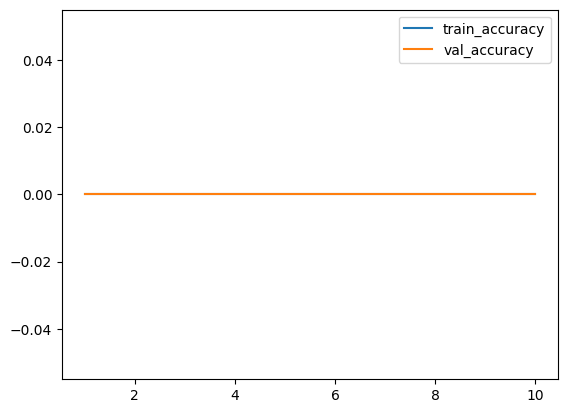

In [54]:
plt.plot(range(1,11),result_df["accuracy"],label="train_accuracy")
plt.plot(range(1,11),result_df["val_accuracy"],label="val_accuracy")
plt.legend()
plt.show()

In [55]:
model.predict(x_test)

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step


array([[ 0.1880967 ],
       [ 0.37335816],
       [ 0.3195222 ],
       ...,
       [-0.1549725 ],
       [ 0.17954376],
       [ 0.6637418 ]], dtype=float32)

In [56]:
model.evaluate (x = x_test, y = y_test)

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.0000e+00 - f1_score: 1.6080 - loss: 4.8898e-07 - precision: 1.0000 - recall: 0.0483


[4.939032010042865e-07, 1.611134648323059, 0.0, 1.0, 0.053274139761924744]

# Attempting to do better

In [57]:
model1 = Sequential()
# Input layer (match input shape to your data)
model1.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))

# Hidden layers
model1.add(Dense(256, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(16, activation='relu'))


model1.add(Dense(1))

# Compile the model for regression with 'mse' loss function
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError(), MeanAbsoluteError()])




/Users/saro/Desktop/dvdrentaldl/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261,985 (1023.38 KB)

 Trainable params: 261,985 (1023.38 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
result = model1.fit(x_train, y_train, epochs=80, validation_data=(x_test, y_test))


Epoch 1/80
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.4772 - mean_absolute_error: 1.8312 - mean_squared_error: 5.4772 - val_loss: 1.4239 - val_mean_absolute_error: 0.8781 - val_mean_squared_error: 1.4239
Epoch 2/80
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1040 - mean_absolute_error: 0.7767 - mean_squared_error: 1.1040 - val_loss: 0.4530 - val_mean_absolute_error: 0.4511 - val_mean_squared_error: 0.4530
Epoch 3/80
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4219 - mean_absolute_error: 0.4351 - mean_squared_error: 0.4219 - val_loss: 0.6474 - val_mean_absolute_error: 0.4698 - val_mean_squared_error: 0.6474
Epoch 4/80
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3773 - mean_absolute_error: 0.3851 - mean_squared_error: 0.3773 - val_loss: 0.2000 - val_mean_absolute_error: 0.2546 - val_mean_squared_error: 0.2000
Epoch 5/80
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3592 - mean_absolute_error: 0.3857 - mean_squared_error: 0.3592 - val_loss: 0.7090 - val_m

In [60]:
result.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error'])

In [61]:
# Evaluate the model
test_loss = model1.evaluate(x_test, y_test)
print(f'Test Loss (MSE): {test_loss}')

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 0.0036 - mean_absolute_error: 0.0373 - mean_squared_error: 0.0036
Test Loss (MSE): [0.0036337818019092083, 0.0036337818019092083, 0.037660930305719376]


In [62]:
from sklearn.metrics import r2_score
y_pred = model1.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f'R² score: {r2}')


113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
R² score: 0.9993524294423104


In [63]:
result_df = pd.DataFrame(result.history)
result_df

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
0,3.603684,1.462054,3.603684,1.423910,0.878143,1.423910
1,0.960830,0.711635,0.960830,0.452987,0.451069,0.452987
2,0.425927,0.433589,0.425927,0.647444,0.469761,0.647444
3,0.334509,0.360668,0.334509,0.199986,0.254646,0.199986
4,0.345655,0.381843,0.345655,0.708978,0.675777,0.708978
...,...,...,...,...,...,...
75,0.013434,0.066624,0.013434,0.012232,0.077245,0.012232
76,0.022217,0.078320,0.022217,0.037571,0.145413,0.037571
77,0.018062,0.077075,0.018062,0.008566,0.059115,0.008566
78,0.047237,0.089442,0.047237,0.009416,0.062855,0.009416


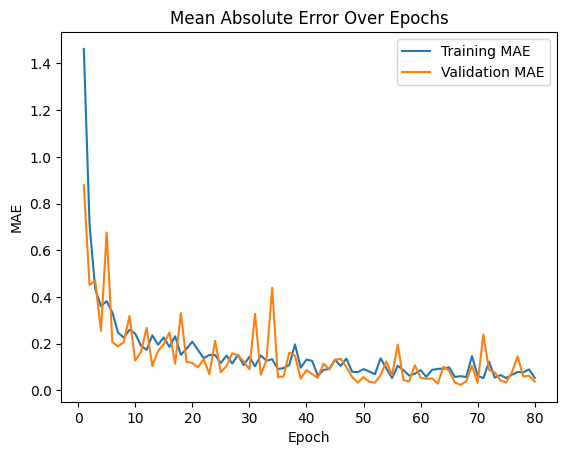

In [64]:
# Plot Mean Absolute Error (MAE) over epochs
plt.plot(range(1, 81), result_df['mean_absolute_error'], label='Training MAE')
plt.plot(range(1, 81), result_df['val_mean_absolute_error'], label='Validation MAE')

plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

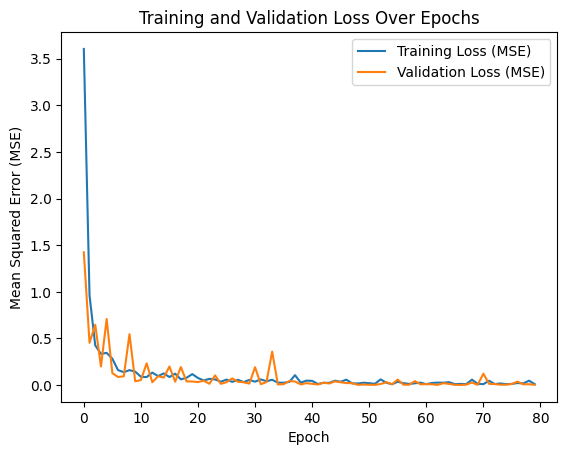

In [65]:
# Plot the training and validation loss
plt.plot(result.history['loss'], label='Training Loss (MSE)')
plt.plot(result.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step


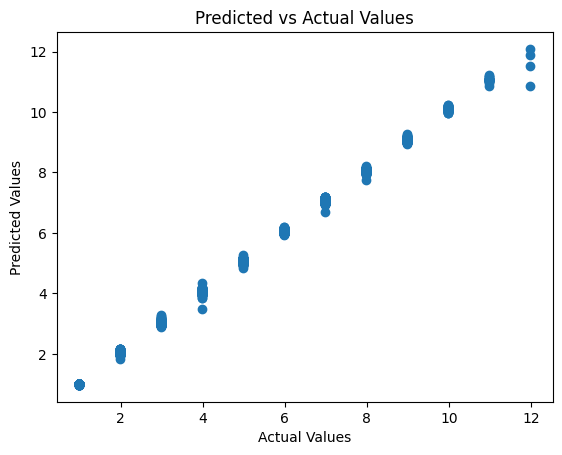

In [66]:
# Get predictions for the test set
y_pred = model1.predict(x_test)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [67]:
# Get predictions for the test set
y_pred = model1.predict(x_test)

# If y_test is a pandas Series, convert it to a NumPy array
if isinstance(y_test, pd.Series):
    y_test = y_test.values

# Flatten y_pred if it's a 2D array
y_pred = y_pred.flatten()

# Calculate residuals (errors)
residuals = y_test - y_pred


113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step


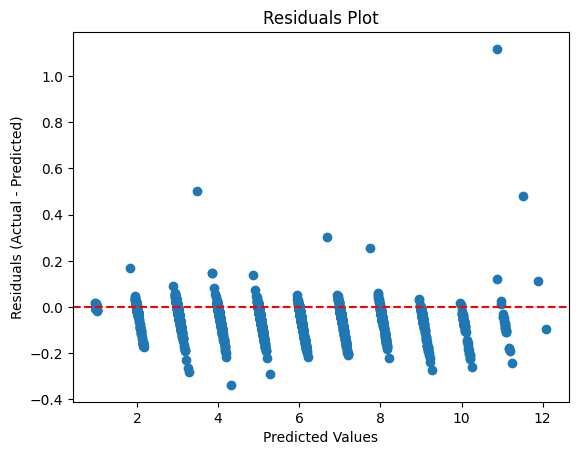

In [68]:
# Plot residuals
plt.scatter(y_pred, residuals)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:
# model = Sequential()
# #input dimension 8 neuron - developer scope
# model.add(Dense(512,input_dim = x_train_scaler_df.shape[1],activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer1
# model.add(Dense(256,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer2
# model.add(Dense(256,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
# model.add(Dense(128,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
# model.add(Dense(128,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
# model.add(Dense(64,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
# model.add(Dense(16,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
# model.add(Dense(16,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3

# model.add(Dense(12,activation="softmax")) #output layer
# model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=[tf.keras.metrics.F1Score(),"accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [69]:
model1.save("DL_Algo.h5")

In [70]:
new_model = load_model("DL_Algo.h5")

In [71]:
first_row = x_test.iloc[0].to_numpy()

In [75]:
first_row

array([  4.  ,   0.99, 141.  ,  27.99,   0.  ,   3.  ,   1.  ,   8.  ,
        19.  ,   8.  ,  28.  ])

In [76]:
for x in first_row:
    print(type(x))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [73]:
new_model.predict(np.array([first_row]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[5.978406]], dtype=float32)

In [76]:
x_test['rental_month'].value_counts()

rental_month
7    1661
8    1449
6     494
Name: count, dtype: int64

In [72]:
df['length'].min()

46

In [62]:
x_test.columns

Index(['rental_duration', 'rental_rate', 'length', 'replacement_cost',
       'rating', 'category', 'active', 'rental_month', 'rental_day',
       'return_month', 'return_day'],
      dtype='object')

In [68]:
encoders_cont

{'amount': LabelEncoder(),
 'rental_rate': LabelEncoder(),
 'replacement_cost': LabelEncoder()}

In [73]:
encoders_cont['replacement_cost'].classes_

array([ 9.99, 10.99, 11.99, 12.99, 13.99, 14.99, 15.99, 16.99, 17.99,
       18.99, 19.99, 20.99, 21.99, 22.99, 23.99, 24.99, 25.99, 26.99,
       27.99, 28.99, 29.99])

In [77]:
array = ['Horror', 'Documentary', 'New', 'Classics', 'Games', 'Sci-Fi',
            'Foreign', 'Family', 'Travel', 'Music', 'Sports', 'Comedy',
            'Drama', 'Action', 'Children', 'Animation']

In [84]:
category = 'Horror'
num = array.index(category)
print(float(num))

0.0


In [ ]:
details1.append(float(num))